# Датасет Бейсбол
## Подготовка датасета

Обозначим роли следующими метками: Pitcher - 1, Catcher - 2, Baseman - 3, Outfielder - 4, Relief_P - 5

In [12]:
import numpy  as np
import pandas as pd

data_pd=pd.read_csv('Baseball_formatted.csv', sep=';', decimal=',')

print(data_pd)
print(data_pd.describe())

     Position  Weight  Height    Age
0           2      74     180  22.99
1           2      74     215  34.69
2           2      72     210  30.78
3           3      72     210  35.43
4           3      73     188  35.71
..        ...     ...     ...    ...
110         4      76     192  25.37
111         4      74     235  29.57
112         4      72     185  27.33
113         3      72     194  26.26
114         3      74     220  27.56

[115 rows x 4 columns]
         Position      Weight      Height         Age
count  115.000000  115.000000  115.000000  115.000000
mean     3.200000   73.895652  204.191304   28.552174
std      1.440029    2.157703   20.234977    4.128190
min      1.000000   68.000000  160.000000   22.020000
25%      2.000000   73.000000  188.000000   25.110000
50%      3.000000   74.000000  205.000000   27.940000
75%      4.000000   75.000000  220.000000   31.475000
max      5.000000   81.000000  270.000000   37.740000


## Разведочный анализ данных

('Position', 'Weight', 'Height', 'Age')


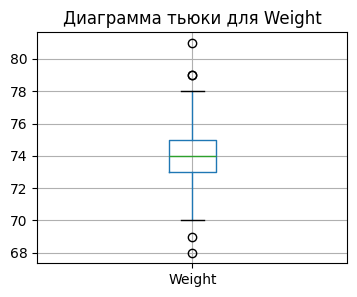

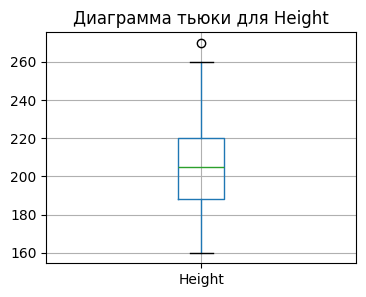

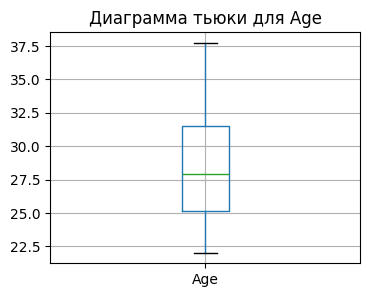

In [51]:
import matplotlib.pyplot as plt

data_columns = tuple(data_pd.columns)
print(data_columns)

for i in range(len(data_pd.iloc[0]) - 1):
    plt.figure(figsize=(4.0,3))
    plt.title(f'Диаграмма тьюки для {data_columns[i+1]}')
    data_pd[[data_columns[i+1]]].boxplot()
    plt.show()
    
plt.show()

Диаграммы Тьюки для веса и роста имеют длинные усы. Также имеются выбросы. Для возраста диаграмма имеет усы не такие длинные.

          Position    Weight    Height       Age
Position  1.000000 -0.058157 -0.152747 -0.018371
Weight   -0.058157  1.000000  0.445074 -0.082647
Height   -0.152747  0.445074  1.000000  0.277046
Age      -0.018371 -0.082647  0.277046  1.000000


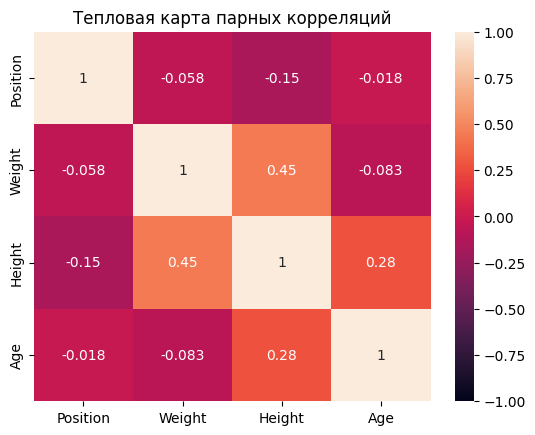

In [25]:
import seaborn as sns

corr_matr = data_pd.corr()
print(corr_matr)

sns.heatmap(corr_matr, annot= True, vmin=-1, vmax=1)
plt.title('Тепловая карта парных корреляций')
plt.show()

По парным корреляциям видно, что вес коррелирует с ростом, и рост коррелирует с возрастом. Это правда и это очевидно. Однако, можно заметить, что значение позиции имеет малую корреляцию с данными параметрами. Это влияет на качество модели линейной регрессии, которую можно построить по ним.

          Position    Weight    Height       Age
Position  1.000000  0.017659 -0.142878  0.028713
Weight    0.017659  1.000000  0.486141 -0.239729
Height   -0.142878  0.486141  1.000000  0.352009
Age       0.028713 -0.239729  0.352009  1.000000


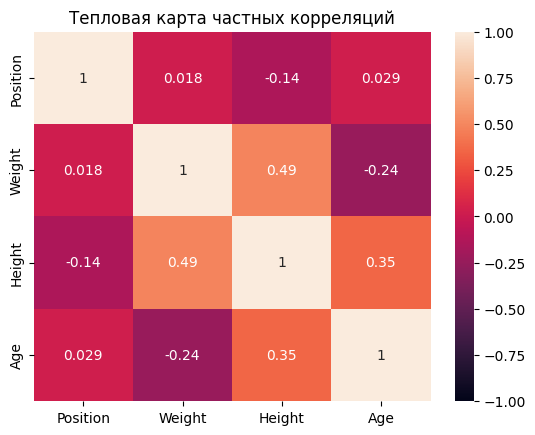

In [26]:
import pingouin

pcorr_matr = data_pd.pcorr()
print(pcorr_matr)

sns.heatmap(pcorr_matr, annot= True, vmin=-1, vmax=1)
plt.title('Тепловая карта частных корреляций')
plt.show()

In [52]:
#Количество параметров
n = len(data_pd)
k = len(data_pd.iloc[0]) - 1

def minor(A, i, j):
    a_shape = A.shape[0]
    M = np.eye(a_shape - 1)
    M[:i,:j] = A[:i,:j]
    M[:i,j:] = A[:i,j+1:]
    M[i:,:j] = A[i+1:,:j]
    M[i:,j:] = A[i+1:,j+1:]

    return M

def alg_dop(A, i, j):
    M = minor(A, i, j)
    return (-1)**(i+j) * np.linalg.det(M)

R = corr_matr.values
#Множественная корреляция y к x-ам
R_y_x = np.sqrt(1 - np.linalg.det(R)/alg_dop(R, 0, 0))
print(f'Коэффициент множественной корреляции Position: {R_y_x:.3f}')

Коэффициент множественной корреляции Position: 0.156


Коэффициент множественной коррреляции получился тоже малым. Это значит, что данные параметры имеют слабую линейную связь с позицией.

In [34]:
import scipy.stats

kstest_res = [ scipy.stats.kstest(data_pd.iloc[:,i], 'norm') for i in range(len(data_pd.iloc[0]))]
for i in range(len(kstest_res)):
    print(f'Значение статистики для {data_columns[i]}: {kstest_res[i].statistic:.3f}, pvalue: {kstest_res[i].pvalue:.2e}')

Значение статистики для Position: 0.841, pvalue: 5.51e-92
Значение статистики для Weight: 1.000, pvalue: 0.00e+00
Значение статистики для Height: 1.000, pvalue: 0.00e+00
Значение статистики для Age: 1.000, pvalue: 0.00e+00


Все имеющиеся параметры почти наверняка не распределены нормально.

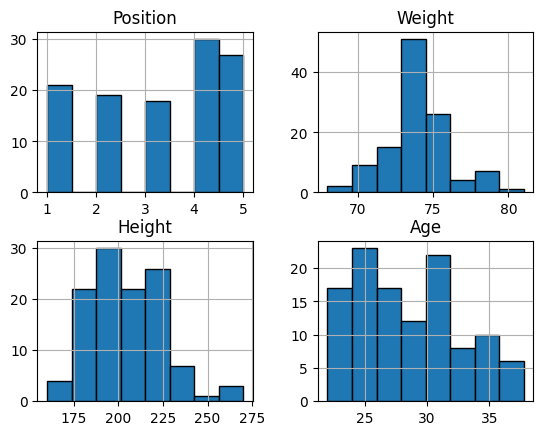

In [35]:
data_pd.iloc[:,:].hist(bins = 8, edgecolor='black')
plt.show()

Ненормальность распределений параметров видна на данных оценках распределений.